In [1]:
# load data

In [2]:
import pandas as pd
import os

In [3]:
CSV_PATH = os.path.join('.', 'housing.csv')

def load_housing_data(csv_path=CSV_PATH):
    return pd.read_csv(csv_path)

raw_data = load_housing_data()

In [4]:
# familiarize self with data

In [5]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

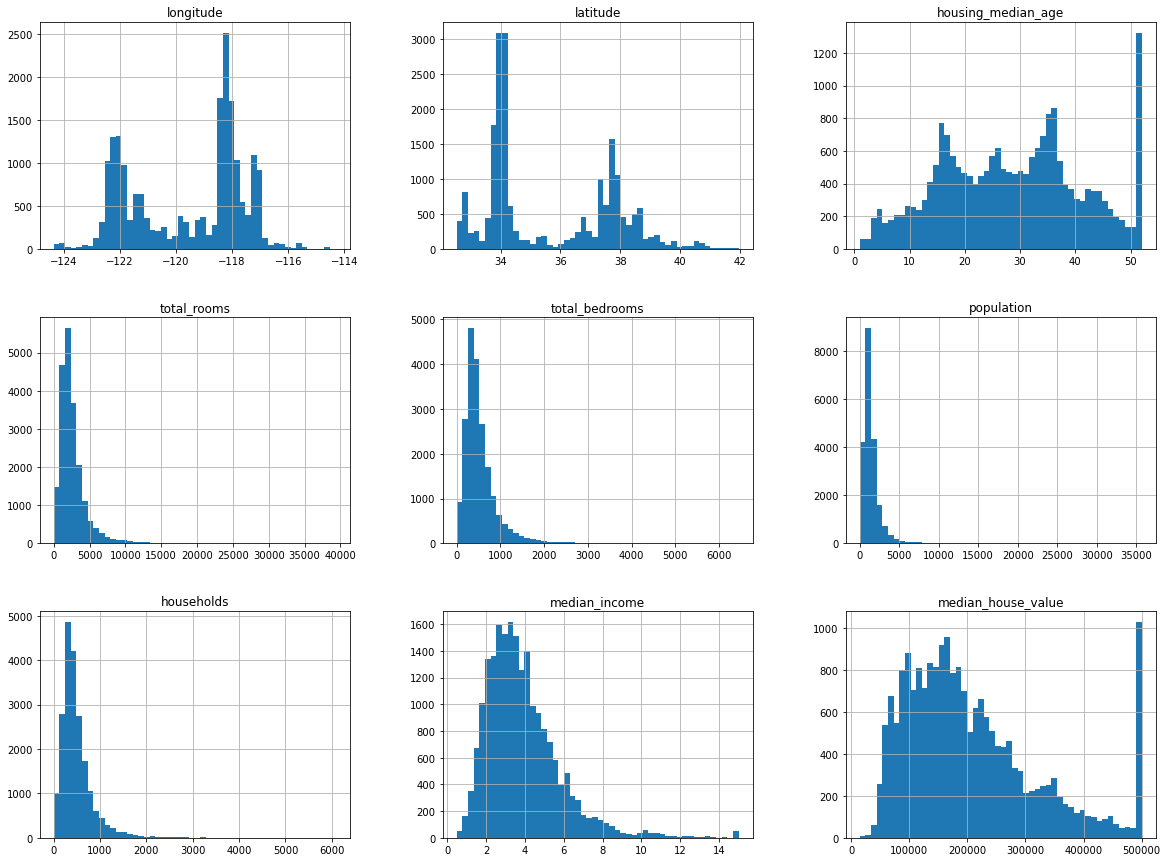

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
raw_data.hist(bins=50, figsize=(20, 15))

In [9]:
# create test set

In [10]:
import numpy as np
raw_data['income_category'] = pd.cut(raw_data['median_income'], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=222)
my_split = stratified_splitter.split(raw_data, raw_data['income_category'])

In [12]:
strat_train_set = None
strat_test_set = None
for train_indices, test_indices in my_split:
    strat_train_set = raw_data.loc[train_indices]
    strat_test_set = raw_data.loc[test_indices]

In [13]:
for set_ in (raw_data, strat_train_set, strat_test_set):
    set_.drop(columns='income_category', inplace=True)

In [14]:
# explore data to gain insights

In [15]:
corr_matrix = strat_train_set.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685259
total_rooms           0.127644
housing_median_age    0.112498
households            0.061783
total_bedrooms        0.046293
population           -0.029338
longitude            -0.043970
latitude             -0.147332
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

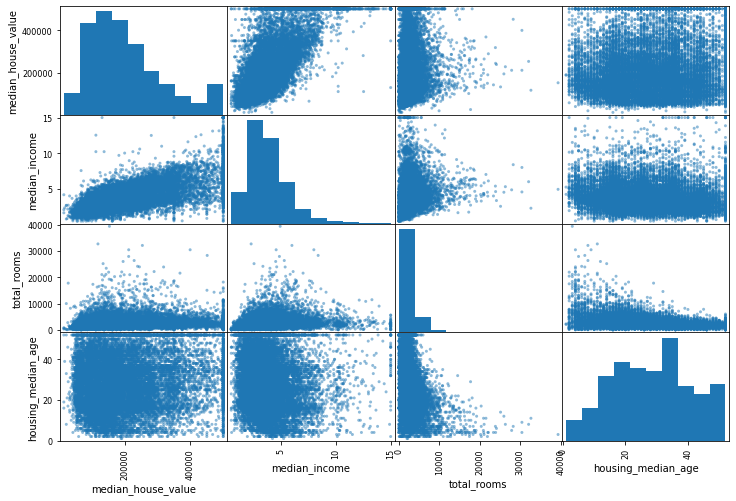

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix_attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(strat_train_set[scatter_matrix_attributes], figsize=(12, 8))

In [17]:
train_set_new_attributes = strat_train_set.copy()
train_set_new_attributes['rooms_per_household'] = train_set_new_attributes['total_rooms'] / train_set_new_attributes['households']
train_set_new_attributes['bedrooms_per_room'] = train_set_new_attributes['total_bedrooms'] / train_set_new_attributes['total_rooms']
train_set_new_attributes['population_per_household'] = train_set_new_attributes['population'] / train_set_new_attributes['households']

In [18]:
new_attributes_corr_matrix = train_set_new_attributes.corr()
new_attributes_corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.685259
rooms_per_household         0.146385
total_rooms                 0.127644
housing_median_age          0.112498
households                  0.061783
total_bedrooms              0.046293
population_per_household   -0.022797
population                 -0.029338
longitude                  -0.043970
latitude                   -0.147332
bedrooms_per_room          -0.250171
Name: median_house_value, dtype: float64

In [19]:
# prepare the data for ML algorithms

In [20]:
train_predictors = strat_train_set.drop(columns='median_house_value')
train_labels = strat_train_set['median_house_value'].copy()

In [21]:
train_predictors_numerical = train_predictors.drop(columns='ocean_proximity')
train_predictors_categorical = pd.DataFrame(train_predictors['ocean_proximity'].copy())

In [22]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')

median_imputer.fit(train_predictors_numerical)
median_imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  434.     ,
       1165.     ,  408.     ,    3.53875])

In [23]:
train_predictors_numerical.median().values

array([-118.5    ,   34.26   ,   29.     , 2125.     ,  434.     ,
       1165.     ,  408.     ,    3.53875])

In [24]:
transformed_train_predictors_numerical = median_imputer.transform(train_predictors_numerical)
transformed_train_predictors_numerical = pd.DataFrame(transformed_train_predictors_numerical, columns=train_predictors_numerical.columns, index=train_predictors_numerical.index)

In [25]:
from sklearn.preprocessing import OneHotEncoder

category_encoder = OneHotEncoder()
transformed_train_predictors_categorical = category_encoder.fit_transform(train_predictors_categorical)

category_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [26]:
# create a data preparation pipeline

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class NumericalAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=False, add_rooms_per_household=False, add_population_per_household=False):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        self.add_rooms_per_household = add_rooms_per_household
        self.add_population_per_household = add_population_per_household
        return
    
    def fit(self, X):
        return self
    
    def transform(self, X):
        new_columns = None
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            if new_columns is None:
                new_columns = bedrooms_per_room
            else:
                new_columns = np.c_[new_columns, bedrooms_per_room]
        if self.add_rooms_per_household:
            rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
            if new_columns is None:
                new_columns = rooms_per_household
            else:
                new_columns = np.c_[new_columns, rooms_per_household]
        if self.add_population_per_household:
            population_per_household = X[:, population_ix] / X[:, households_ix]
            if new_columns is None:
                new_columns = population_per_household
            else:
                new_columns = np.c_[new_columns, population_per_household]
        if new_columns is None:
            return X
        return np.c_[X, new_columns]
        

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [29]:
class DataPreparationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer_strategy='median', add_bpr=False, add_rph=False, add_pph=False):
        self.categorical_attributes = ['ocean_proximity']
        self.numerical_attributes = list(train_predictors.drop(columns=self.categorical_attributes))
        self.numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy=imputer_strategy)),
                                           ('attribute_adder', NumericalAttributesAdder(add_bedrooms_per_room=add_bpr, add_rooms_per_household=add_rph, add_population_per_household=add_pph)),
                                           ('scaler', StandardScaler())])
        self.preparation_pipeline = ColumnTransformer([('numerical', self.numerical_pipeline, self.numerical_attributes)
                                                       , ('categorical', OneHotEncoder(handle_unknown='ignore'), self.categorical_attributes)])
        return
    
    def fit(self, X):
        self.preparation_pipeline.fit(X)
        categorical_encoder = self.preparation_pipeline.named_transformers_['categorical']
        self.attributes = np.array(self.numerical_attributes + list(categorical_encoder.categories_[0]))
        return self
    
    def transform(self, X):
        return self.preparation_pipeline.transform(X)

In [30]:
data_prep = DataPreparationTransformer(add_bpr=True)
prepared_train_predictors = data_prep.fit_transform(train_predictors)
prepared_train_predictors

array([[ 0.89461447, -0.98258716,  0.27298301, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.35128181, -0.68794799, -0.99928753, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.68219758, -0.91711179, -0.99928753, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.80516935,  1.4727393 , -1.23783825, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.62045579, -0.73471611,  1.14766901, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.58057816, -0.82825236,  0.98863519, ...,  0.        ,
         0.        ,  0.        ]])

In [31]:
# test some models with prepared training data

In [32]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(prepared_train_predictors, train_labels)

LinearRegression()

In [33]:
from sklearn.metrics import mean_squared_error

linear_train_predictions = linear_regression.predict(prepared_train_predictors)
np.sqrt(mean_squared_error(linear_train_predictions, train_labels))

68756.91900927413

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor()
negative_cv_tree_scores = cross_val_score(tree_reg, prepared_train_predictors, train_labels, scoring='neg_mean_squared_error', cv=10)

In [35]:
tree_rmse_scores = np.sqrt(-negative_cv_tree_scores)
tree_rmse_scores.mean()

70690.73330541342

In [36]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

negative_cv_forest_scores = cross_val_score(forest_reg, prepared_train_predictors, train_labels, scoring='neg_mean_squared_error', cv=10)

In [37]:
forest_rmse_scores = np.sqrt(-negative_cv_forest_scores)
forest_rmse_scores.mean()

49475.05235112138

In [38]:
# fine tune your model

In [39]:
# 4. Create a single pipeline for data prep and prediction

In [40]:
from sklearn.svm import SVR

In [41]:
class PreparationAndPredictor(BaseEstimator):
    def __init__(self, imputer_strategy='median', add_bpr=False, add_rph=False, add_pph=False, predictor_name='linear', n_estimators=10, max_features=10, kernel='linear', C=1.0, gamma='scale'):
        self.imputer_strategy = imputer_strategy
        self.add_bpr = add_bpr
        self.add_rph = add_rph
        self.add_pph = add_pph
        self.predictor_name = predictor_name
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        return
    
    def fit(self, X, y=None):
        self.data_preparation_transformer = DataPreparationTransformer(imputer_strategy=self.imputer_strategy, add_bpr=self.add_bpr, add_rph=self.add_rph, add_pph=self.add_pph)
        self.prepared_training_data = self.data_preparation_transformer.fit_transform(X)
        
        if self.predictor_name == 'linear':
            self.predictor_instance = LinearRegression()
        elif self.predictor_name == 'tree':
            self.predictor_instance = DecisionTreeRegressor()
        elif self.predictor_name == 'forest':
            self.predictor_instance = RandomForestRegressor(n_estimators=self.n_estimators, max_features=self.max_features)
        elif self.predictor_name == 'svm':
            self.predictor_instance = SVR(kernel=self.kernel, C=self.C, gamma=self.gamma)
            
        self.predictor_instance.fit(self.prepared_training_data, y)
        return self
    
    def predict(self, X):
        self.prepared_predictors = self.data_preparation_transformer.transform(X)
        return self.predictor_instance.predict(self.prepared_predictors)

In [42]:
predictor = PreparationAndPredictor(add_bpr=True)
predictor.fit(train_predictors, train_labels)
predictions = predictor.predict(train_predictors)

In [43]:
mse = mean_squared_error(predictions, train_labels)
np.sqrt(mse)

68756.91900927413

In [44]:
# 5. use GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'predictor_name' : ['linear'], 'add_bpr' : [True, False]},
              {'predictor_name' : ['tree'], 'add_bpr' : [True, False], 'max_features' : [4, 8, None]},
             {'predictor_name' : ['forest'], 'add_bpr' : [True, False], 'n_estimators' : [1, 25, 50], 'max_features' : [4, 8, None]}]

predictor = PreparationAndPredictor()

grid_search = GridSearchCV(predictor, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_predictors, train_labels)

In [ ]:
grid_search.best_estimator_

In [ ]:
cv_results = grid_search.cv_results_
for negative_mse, params in sorted(zip(cv_results['mean_test_score'], cv_results['params']), reverse=True):
    print(f'{params}  ==  {np.sqrt(-negative_mse)}')

In [ ]:
optimal_predictor = grid_search.best_estimator_

In [ ]:
train_predictors.iloc[0:1]

In [ ]:
optimal_predictor.predict(train_predictors.iloc[0:1])

In [ ]:
train_labels[0]

In [ ]:
# evaluate your system on the test set

In [ ]:
test_predictors = strat_test_set.drop(columns='median_house_value')
test_labels = strat_test_set['median_house_value'].copy()

test_predictions = optimal_predictor.predict(test_predictors)

In [ ]:
mse = mean_squared_error(test_predictions, test_labels)
rmse = np.sqrt(mse)
rmse

In [ ]:
from scipy import stats
confidence = .99
squared_errors = (test_predictions - test_labels) ** 2
mse_interval = stats.t.interval(confidence, len(squared_errors - 1), loc=squared_errors.mean(), scale=stats.sem(squared_errors))
rmse_interval = np.sqrt(mse_interval)
rmse_interval

In [ ]:
######################################################## EXTRAS ########################################################

In [ ]:
# 1. try a SVM regressor, 2. try RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [ ]:
param_distributions = [{'predictor_name' : ['svm'], 'kernel' : ['linear'], 'C' : uniform(.01, 9.99)},
                       {'predictor_name' : ['svm'], 'kernel' : ['rbf'], 'C' : uniform(.01, 9.99), 'gamma' : ['scale', 'auto']}]

predictor = PreparationAndPredictor()
random_search = RandomizedSearchCV(predictor, param_distributions, n_iter=1, cv=5, scoring='neg_mean_squared_error')
random_search.fit(train_predictors, train_labels)

In [ ]:
random_search.best_estimator_

In [ ]:
mse = -random_search.cv_results_['mean_test_score']
rmse = np.sqrt(mse)
rmse

In [ ]:
# 3. add transformer to preparation pipeline that selects only the most important attributes.
# train a random forest regressor on all the features, then drop all columns with feature importance
# less than the specified threshold

In [ ]:
class PreparationAndDropLeastImportantFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, imputer_strategy='median', add_bpr=False, add_rph=False, add_pph=False, n_estimators=10, max_features=10, feature_importance_threshold=.1):
        self.imputer_strategy = imputer_strategy
        self.add_bpr = add_bpr
        self.add_rph = add_rph
        self.add_pph = add_pph
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.feature_importance_threshold = feature_importance_threshold
        return
    
    def fit(self, X, y=None):
        self.data_preparation_transformer = DataPreparationTransformer(imputer_strategy=self.imputer_strategy, add_bpr=self.add_bpr, add_rph=self.add_rph, add_pph=self.add_pph)
        self.prepared_training_data = self.data_preparation_transformer.fit_transform(X)
        self.random_forest_regressor = RandomForestRegressor(n_estimators=self.n_estimators, max_features=self.max_features)            
        self.random_forest_regressor.fit(self.prepared_training_data, y)
        self.feature_importances_ = self.random_forest_regressor.feature_importances_
        self.preserve_columns_flag = self.feature_importances_[:] >= self.feature_importance_threshold
        self.attributes = self.data_preparation_transformer.attributes[self.preserve_columns_flag]
        return self
    
    def transform(self, X):
        self.prepared_predictors = self.data_preparation_transformer.transform(X)
        return self.prepared_predictors[:, self.preserve_columns_flag]

In [ ]:
prep_and_drop = PreparationAndDropLeastImportantFeatures()

In [ ]:
prep_and_drop.fit(train_predictors, train_labels)

In [ ]:
prep_and_drop.preserve_columns_flag

In [ ]:
prep_and_drop.feature_importances_

In [ ]:
prepped_and_dropped_train_predictors = prep_and_drop.transform(train_predictors)
prepped_and_dropped_train_predictors.shape

In [ ]:
prep_and_drop.attributes